In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [5]:
engine = create_engine("sqlite:///resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# inspect the measurement table
inspector = inspect(engine)
columns = inspector.get_columns('measurement') 
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Climate Analysis

('2017-08-23',)


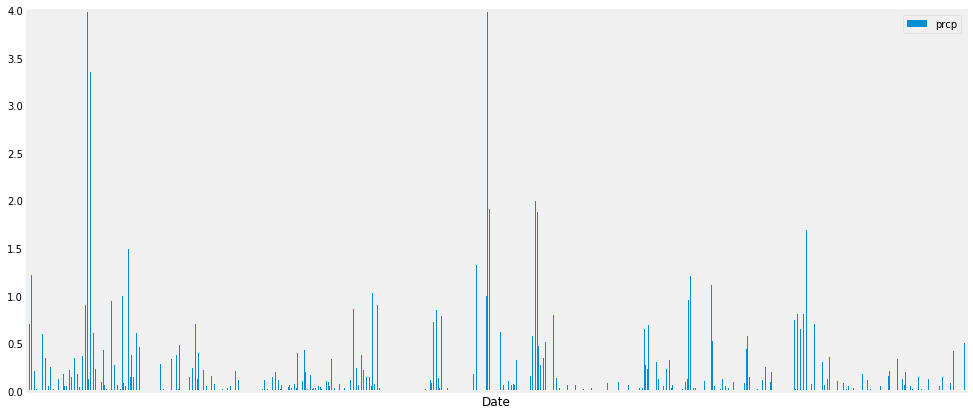

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Last date in the database
print(session.query(Measurement.date).order_by(Measurement.date.desc()).first()) 

# Calculate the date 1 year ago from the last data point in the database
date_oneyear = dt.date(2017, 8, 23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
prcp_score = session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date >= date_oneyear).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(prcp_score[::], columns=['prcp', 'Date'])
df.set_index('Date', inplace=True)
df.head(10)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(kind = 'bar', figsize=(15,7))
plt.xticks([])
plt.grid()
plt.ylim(0, 4)
plt.legend(loc = 'upper right')
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all() 

[(9)]

In [17]:
date = session.query(Measurement.date).all()
for t in date:
    print(t)

('2010-01-01',)
('2010-01-02',)
('2010-01-03',)
('2010-01-04',)
('2010-01-06',)
('2010-01-07',)
('2010-01-08',)
('2010-01-09',)
('2010-01-10',)
('2010-01-11',)
('2010-01-12',)
('2010-01-14',)
('2010-01-15',)
('2010-01-16',)
('2010-01-17',)
('2010-01-18',)
('2010-01-19',)
('2010-01-20',)
('2010-01-21',)
('2010-01-22',)
('2010-01-23',)
('2010-01-24',)
('2010-01-25',)
('2010-01-26',)
('2010-01-27',)
('2010-01-28',)
('2010-01-30',)
('2010-01-31',)
('2010-02-01',)
('2010-02-03',)
('2010-02-04',)
('2010-02-05',)
('2010-02-06',)
('2010-02-07',)
('2010-02-08',)
('2010-02-09',)
('2010-02-11',)
('2010-02-12',)
('2010-02-13',)
('2010-02-14',)
('2010-02-15',)
('2010-02-16',)
('2010-02-17',)
('2010-02-19',)
('2010-02-20',)
('2010-02-21',)
('2010-02-22',)
('2010-02-23',)
('2010-02-24',)
('2010-02-25',)
('2010-02-26',)
('2010-02-28',)
('2010-03-01',)
('2010-03-02',)
('2010-03-03',)
('2010-03-04',)
('2010-03-05',)
('2010-03-06',)
('2010-03-07',)
('2010-03-08',)
('2010-03-09',)
('2010-03-11',)
('2010-0

('2016-05-29',)
('2016-05-30',)
('2016-05-31',)
('2016-06-01',)
('2016-06-02',)
('2016-06-03',)
('2016-06-04',)
('2016-06-05',)
('2016-06-06',)
('2016-06-07',)
('2016-06-08',)
('2016-06-09',)
('2016-06-10',)
('2016-06-11',)
('2016-06-12',)
('2016-06-13',)
('2016-06-14',)
('2016-06-15',)
('2016-06-16',)
('2016-06-17',)
('2016-06-18',)
('2016-06-19',)
('2016-06-20',)
('2016-06-21',)
('2016-06-22',)
('2016-06-23',)
('2016-06-24',)
('2016-06-25',)
('2016-06-26',)
('2016-06-27',)
('2016-06-28',)
('2016-06-29',)
('2016-06-30',)
('2016-07-01',)
('2016-07-02',)
('2016-07-03',)
('2016-07-04',)
('2016-07-05',)
('2016-07-06',)
('2016-07-07',)
('2016-07-08',)
('2016-07-09',)
('2016-07-10',)
('2016-07-11',)
('2016-07-12',)
('2016-07-13',)
('2016-07-14',)
('2016-07-15',)
('2016-07-16',)
('2016-07-17',)
('2016-07-18',)
('2016-07-19',)
('2016-07-20',)
('2016-07-21',)
('2016-07-22',)
('2016-07-23',)
('2016-07-24',)
('2016-07-25',)
('2016-07-26',)
('2016-07-27',)
('2016-07-28',)
('2016-07-29',)
('2016-0

('2013-03-12',)
('2013-03-13',)
('2013-03-14',)
('2013-03-15',)
('2013-03-16',)
('2013-03-17',)
('2013-03-18',)
('2013-03-19',)
('2013-03-20',)
('2013-03-21',)
('2013-03-22',)
('2013-03-23',)
('2013-03-24',)
('2013-03-25',)
('2013-03-26',)
('2013-03-27',)
('2013-03-28',)
('2013-03-29',)
('2013-03-30',)
('2013-03-31',)
('2013-04-01',)
('2013-04-02',)
('2013-04-03',)
('2013-04-04',)
('2013-04-05',)
('2013-04-06',)
('2013-04-07',)
('2013-04-08',)
('2013-04-09',)
('2013-04-10',)
('2013-04-11',)
('2013-04-12',)
('2013-04-13',)
('2013-04-14',)
('2013-04-15',)
('2013-04-16',)
('2013-04-17',)
('2013-04-18',)
('2013-04-19',)
('2013-04-20',)
('2013-04-21',)
('2013-04-22',)
('2013-04-23',)
('2013-04-24',)
('2013-04-25',)
('2013-04-26',)
('2013-04-27',)
('2013-04-28',)
('2013-04-29',)
('2013-04-30',)
('2013-05-01',)
('2013-05-02',)
('2013-05-03',)
('2013-05-04',)
('2013-05-05',)
('2013-05-06',)
('2013-05-07',)
('2013-05-08',)
('2013-05-09',)
('2013-05-10',)
('2013-05-11',)
('2013-05-12',)
('2013-0

('2011-06-27',)
('2011-06-28',)
('2011-07-01',)
('2011-07-03',)
('2011-07-04',)
('2011-07-05',)
('2011-07-06',)
('2011-07-07',)
('2011-07-08',)
('2011-07-09',)
('2011-07-10',)
('2011-07-12',)
('2011-07-13',)
('2011-07-14',)
('2011-07-15',)
('2011-07-16',)
('2011-07-18',)
('2011-07-19',)
('2011-07-20',)
('2011-07-21',)
('2011-07-22',)
('2011-07-25',)
('2011-07-26',)
('2011-07-27',)
('2011-07-28',)
('2011-07-29',)
('2011-07-30',)
('2011-08-01',)
('2011-08-02',)
('2011-08-03',)
('2011-08-04',)
('2011-08-05',)
('2011-08-07',)
('2011-08-13',)
('2011-08-15',)
('2011-08-16',)
('2011-08-17',)
('2011-08-18',)
('2011-08-25',)
('2011-08-26',)
('2011-08-27',)
('2011-08-29',)
('2011-08-30',)
('2011-08-31',)
('2011-09-01',)
('2011-09-02',)
('2011-09-03',)
('2011-09-04',)
('2011-09-06',)
('2011-09-07',)
('2011-09-09',)
('2011-09-10',)
('2011-09-12',)
('2011-09-13',)
('2011-09-14',)
('2011-09-15',)
('2011-09-16',)
('2011-09-17',)
('2011-09-19',)
('2011-09-20',)
('2011-09-21',)
('2011-09-22',)
('2011-0

('2011-06-08',)
('2011-06-09',)
('2011-06-13',)
('2011-06-14',)
('2011-06-15',)
('2011-06-16',)
('2011-06-17',)
('2011-06-20',)
('2011-06-21',)
('2011-06-22',)
('2011-06-23',)
('2011-06-24',)
('2011-06-27',)
('2011-06-28',)
('2011-06-29',)
('2011-06-30',)
('2011-07-01',)
('2011-07-06',)
('2011-07-07',)
('2011-07-08',)
('2011-07-11',)
('2011-07-12',)
('2011-07-13',)
('2011-07-14',)
('2011-07-15',)
('2011-07-18',)
('2011-07-19',)
('2011-07-24',)
('2011-07-26',)
('2011-07-27',)
('2011-07-28',)
('2011-08-01',)
('2011-08-02',)
('2011-08-03',)
('2011-08-04',)
('2011-08-05',)
('2011-08-08',)
('2011-08-09',)
('2011-08-10',)
('2011-08-11',)
('2011-08-12',)
('2011-08-15',)
('2011-08-16',)
('2011-08-17',)
('2011-08-18',)
('2011-08-22',)
('2011-08-23',)
('2011-08-24',)
('2011-08-29',)
('2011-08-31',)
('2011-09-01',)
('2011-09-02',)
('2011-09-06',)
('2011-09-07',)
('2011-09-08',)
('2011-09-09',)
('2011-09-12',)
('2011-09-13',)
('2011-09-14',)
('2011-09-15',)
('2011-09-16',)
('2011-09-19',)
('2011-0

('2010-12-18',)
('2010-12-19',)
('2010-12-20',)
('2010-12-21',)
('2010-12-22',)
('2010-12-23',)
('2010-12-24',)
('2010-12-25',)
('2010-12-26',)
('2010-12-27',)
('2010-12-28',)
('2010-12-29',)
('2010-12-30',)
('2010-12-31',)
('2011-01-01',)
('2011-01-02',)
('2011-01-03',)
('2011-01-04',)
('2011-01-05',)
('2011-01-06',)
('2011-01-07',)
('2011-01-08',)
('2011-01-09',)
('2011-01-10',)
('2011-01-11',)
('2011-01-12',)
('2011-01-13',)
('2011-01-14',)
('2011-01-15',)
('2011-01-16',)
('2011-01-17',)
('2011-01-18',)
('2011-01-19',)
('2011-01-20',)
('2011-01-21',)
('2011-01-22',)
('2011-01-23',)
('2011-01-24',)
('2011-01-25',)
('2011-01-26',)
('2011-01-27',)
('2011-01-28',)
('2011-01-29',)
('2011-01-30',)
('2011-01-31',)
('2011-02-01',)
('2011-02-02',)
('2011-02-03',)
('2011-02-04',)
('2011-02-05',)
('2011-02-06',)
('2011-02-07',)
('2011-02-08',)
('2011-02-09',)
('2011-02-10',)
('2011-02-11',)
('2011-02-12',)
('2011-02-13',)
('2011-02-15',)
('2011-02-16',)
('2011-02-17',)
('2011-02-18',)
('2011-0

('2017-01-04',)
('2017-01-05',)
('2017-01-06',)
('2017-01-07',)
('2017-01-08',)
('2017-01-09',)
('2017-01-10',)
('2017-01-12',)
('2017-01-15',)
('2017-01-16',)
('2017-01-18',)
('2017-01-19',)
('2017-01-20',)
('2017-01-21',)
('2017-01-22',)
('2017-01-23',)
('2017-01-24',)
('2017-01-25',)
('2017-01-26',)
('2017-01-27',)
('2017-01-29',)
('2017-01-30',)
('2017-01-31',)
('2017-02-01',)
('2017-02-02',)
('2017-02-03',)
('2017-02-04',)
('2017-02-05',)
('2017-02-06',)
('2017-02-07',)
('2017-02-08',)
('2017-02-09',)
('2017-02-10',)
('2017-02-11',)
('2017-02-12',)
('2017-02-13',)
('2017-02-15',)
('2017-02-16',)
('2017-02-17',)
('2017-02-18',)
('2017-02-20',)
('2017-02-22',)
('2017-02-23',)
('2017-02-24',)
('2017-02-26',)
('2017-02-27',)
('2017-02-28',)
('2017-03-01',)
('2017-03-02',)
('2017-03-03',)
('2017-03-04',)
('2017-03-06',)
('2017-03-09',)
('2017-03-10',)
('2017-03-11',)
('2017-03-12',)
('2017-03-13',)
('2017-03-14',)
('2017-03-15',)
('2017-03-16',)
('2017-03-17',)
('2017-03-18',)
('2017-0

('2015-11-14',)
('2015-11-15',)
('2015-11-16',)
('2015-11-17',)
('2015-11-18',)
('2015-11-19',)
('2015-11-20',)
('2015-11-21',)
('2015-11-22',)
('2015-11-23',)
('2015-11-24',)
('2015-11-25',)
('2015-11-26',)
('2015-11-27',)
('2015-11-28',)
('2015-11-29',)
('2015-11-30',)
('2015-12-01',)
('2015-12-02',)
('2015-12-03',)
('2015-12-04',)
('2015-12-05',)
('2015-12-06',)
('2015-12-07',)
('2015-12-08',)
('2015-12-09',)
('2015-12-10',)
('2015-12-11',)
('2015-12-12',)
('2015-12-13',)
('2015-12-14',)
('2015-12-15',)
('2015-12-16',)
('2015-12-17',)
('2015-12-18',)
('2015-12-19',)
('2015-12-20',)
('2015-12-21',)
('2015-12-22',)
('2015-12-23',)
('2015-12-24',)
('2015-12-25',)
('2015-12-26',)
('2015-12-27',)
('2015-12-28',)
('2015-12-29',)
('2015-12-30',)
('2015-12-31',)
('2016-01-01',)
('2016-01-02',)
('2016-01-03',)
('2016-01-04',)
('2016-01-05',)
('2016-01-06',)
('2016-01-07',)
('2016-01-08',)
('2016-01-09',)
('2016-01-10',)
('2016-01-11',)
('2016-01-12',)
('2016-01-13',)
('2016-01-14',)
('2016-0

('2013-12-01',)
('2013-12-02',)
('2013-12-03',)
('2013-12-04',)
('2013-12-05',)
('2013-12-06',)
('2013-12-07',)
('2013-12-08',)
('2013-12-09',)
('2013-12-10',)
('2013-12-11',)
('2013-12-12',)
('2013-12-13',)
('2013-12-14',)
('2013-12-15',)
('2013-12-16',)
('2013-12-17',)
('2013-12-18',)
('2013-12-19',)
('2013-12-20',)
('2013-12-21',)
('2013-12-22',)
('2013-12-23',)
('2013-12-24',)
('2013-12-25',)
('2013-12-26',)
('2013-12-27',)
('2013-12-28',)
('2013-12-29',)
('2013-12-30',)
('2014-01-01',)
('2014-01-02',)
('2014-01-03',)
('2014-01-04',)
('2014-01-05',)
('2014-01-06',)
('2014-01-07',)
('2014-01-08',)
('2014-01-09',)
('2014-01-10',)
('2014-01-11',)
('2014-01-12',)
('2014-01-13',)
('2014-01-14',)
('2014-01-15',)
('2014-01-16',)
('2014-01-17',)
('2014-01-18',)
('2014-01-19',)
('2014-01-20',)
('2014-01-21',)
('2014-01-22',)
('2014-01-23',)
('2014-01-24',)
('2014-01-25',)
('2014-01-26',)
('2014-01-27',)
('2014-01-29',)
('2014-01-30',)
('2014-01-31',)
('2014-02-01',)
('2014-02-02',)
('2014-0

('2015-08-23',)
('2015-08-24',)
('2015-08-25',)
('2015-08-26',)
('2015-08-27',)
('2015-08-28',)
('2015-08-29',)
('2015-08-30',)
('2015-08-31',)
('2015-09-01',)
('2015-09-02',)
('2015-09-03',)
('2015-09-04',)
('2015-09-05',)
('2015-09-06',)
('2015-09-07',)
('2015-09-08',)
('2015-09-09',)
('2015-09-10',)
('2015-09-11',)
('2015-09-12',)
('2015-09-13',)
('2015-09-14',)
('2015-09-15',)
('2015-09-16',)
('2015-09-17',)
('2015-09-18',)
('2015-09-19',)
('2015-09-20',)
('2015-09-21',)
('2015-09-22',)
('2015-09-23',)
('2015-09-24',)
('2015-09-25',)
('2015-09-26',)
('2015-09-27',)
('2015-09-28',)
('2015-09-29',)
('2015-09-30',)
('2015-10-01',)
('2015-10-02',)
('2015-10-03',)
('2015-10-04',)
('2015-10-05',)
('2015-10-06',)
('2015-10-07',)
('2015-10-08',)
('2015-10-09',)
('2015-10-10',)
('2015-10-12',)
('2015-10-13',)
('2015-10-14',)
('2015-10-15',)
('2015-10-16',)
('2015-10-17',)
('2015-10-20',)
('2015-10-21',)
('2015-10-22',)
('2015-10-23',)
('2015-10-24',)
('2015-10-25',)
('2015-10-26',)
('2015-1

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sel = [Measurement.station, func.count(Measurement.id)]
station_count = session.query(*sel).group_by(Measurement.station).order_by(desc(func.count(Measurement.id))).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
sel = [func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
station_temp = session.query(*sel).filter(Measurement.station == 'USC00519281').all()
station_temp

[(54.0, 85.0, 71.66378066378067)]

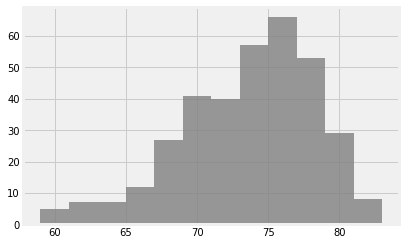

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, 
                       Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= 
                       date_oneyear).order_by(Measurement.date).all()
df = pd.DataFrame(results[::], columns = ['id', 'station', 'data', 'prcp', 'tobs'])
df.head()
plt.hist(df['tobs'], 12, color='grey',alpha=0.8)
plt.show()